# INTRODUCTION


  # Project: NoShowAppointments Data Analysis

### NoShowAppointments is a dataset which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. We have such features like the patients and their  appointments id, the scheduled and appointment day, their age, neighbourhood, if they have or not a scholarship , hypertension, diabetes, alcoholism. Also, if the patient showed up or not, and if they received a sms for the apppointments. The goal here is to know which of all these features impact the most on the patient showing up to their appointments or not.
### First, i will do the data wrangling by loading my dataset, and then i will try to see my data is correct or not. By correct, i mean if my dataset have missing values, duplicated values and so on. Then secondly, i will clean it to make it more efficient. Then i will explore my dataset and try to answer three questions.
### Finally, i will draw conclusions.
 


# Questions :
#### QUESTION 1: Did the scholarship of patients helped in showing up to their appointments?
#### QUESTION 2: between children, women and men, who attend the most their appointments?
#### QUESTION 3: Age impact appointments?

## Now let's start by loading our librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

## Let's load our dataset and look his characteristics 

In [2]:
df = pd.read_csv('C:/Users/HP/.m2/noshowappointments.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Now, i'm going to check the number of rows and columns of my dataset because it's important to know it before checking if there's missing values. Once i know the number of rows, i can compare it to the non null count values 

In [4]:
df.shape

(110527, 14)

### 110527 rows and 14 columns

### Here , i want to check the number of missing rows. It's important to know if there's missing rows because it helps us to know if we have all informations we need for the analysis or if some features dont have information for us

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Our dataset has no missing values because all columns have 110527 non null count, which is the number of rows 
### Let's see if we have duplicated rows. It's important because if we have two rows with the same values, it's not interesting and it can make our data analysis skewed

In [6]:
df.duplicated().sum()

0

### We have 0 duplicated rows. Now, let's see some statistics about our dataset , such as the mean for each features and so on. This may help us to understand more our dataset and get more details about each features

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Let's see if we have null values. It's important because null vales wont give us any indication in the data, so we may drop them in the data cleaning part

In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Since there's no missing values, we are going to check features's types. It's always important to check the type of each features. Since we're gonna statistics, we need to knwo if all types are right. If not, we will change them in the data cleaning part

In [9]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### All types are actually right for the analysis i want to do. Now, for the column Age, i'm checking if there's negative age which is not possible. Nobobdy has a negative age. So, i will first check the number of unique values in this column. If there's a negative number, i will then check his index then i will remove it in the data cleaning part

In [10]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [11]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Now, i know all the characteristics of my datasets. Our dataset doesnt have missing , null or duplicated values. But, some columns are useless in our data analysis because they wont be impacting the question i will try to answer. I will remove them and also remove the rows nulber 99832 because the age is negative and that's not possible. So i will remove it. Time for data cleaning !

## Data Cleaning

### I will first drop these useless columns and check if i make it right

In [12]:
df.drop(['PatientId', 'AppointmentID', 'AppointmentDay', 'SMS_received', 'ScheduledDay'], axis=1, inplace=True)

In [13]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


### Here, i just wanna change all columns names to lower case just to make them easy to use on my computer

In [14]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [15]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


### Here, i'm replacing the no-show column by no_show, just for my own aesthetic

In [16]:
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

In [17]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


### Now, i'm dropping the negative value

In [18]:
df.drop(index = 99832, axis=0, inplace=True)

In [19]:
df[df['age']==-1]

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show


In [20]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


 ### Replacing YES AND NO by 1 AND 0 in the no_show column , to use it more efficiently

In [21]:
df['no_show'].replace(['Yes', 'No'],['0', '1'], inplace=True)

In [22]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,1


## My data is now cleaned. Time to explore it and answer the three questions:
#### QUESTION 1: Did the scholarship of patients helped in showing up to their appointments?
#### QUESTION 2: between children, women and men, who attend the most their appointments?
#### QUESTION 3: Age impact appointments?


## Exploratory Data Analysis

### I will first do  histogram for each features , just to see how many male or female we have,  how many people have hipertension, diabetes, alcoholism, handcap or not and also how many people showed up or not. All these are important because we can use them to know what we must point to get a better analysis. 


Text(0.5, 1.0, 'Number of Male and Female in the dataset')

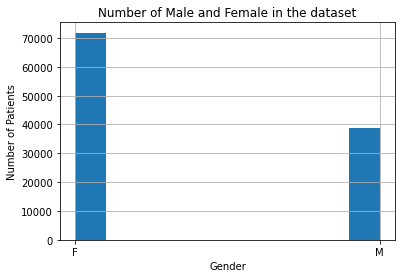

In [23]:
ax= df['gender'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Gender')
ax.set_title('Number of Male and Female in the dataset')

#### There's more female than male in our dataset with more than 70000 female and less than 40000. We still cant say if women showed up more to their appointments than men based on the histogram above

Text(0.5, 1.0, 'Age of Patients')

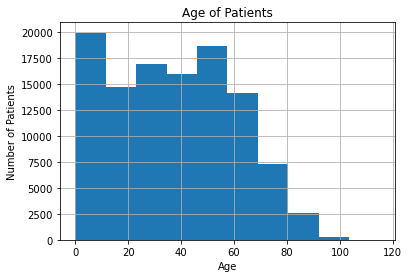

In [24]:
ax= df['age'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Age')
ax.set_title('Age of Patients')

#### In age histogram, we can see that patients are mostly young or adults

Text(0.5, 1.0, 'Number of Patients with and without scholarship')

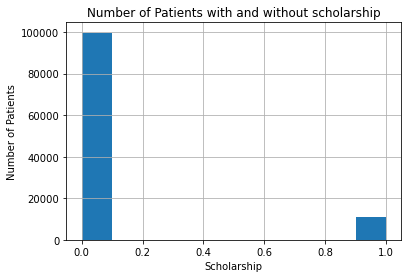

In [25]:
ax= df['scholarship'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Scholarship')
ax.set_title('Number of Patients with and without scholarship')

#### people without scholarship are more than the one with scholarship

Text(0.5, 1.0, 'Number of Patients with and without hipertension ')

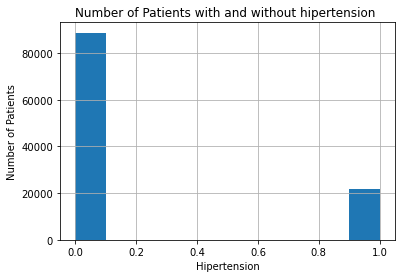

In [26]:
ax= df['hipertension'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Hipertension')
ax.set_title('Number of Patients with and without hipertension ')

#### people with hipertension are less than the ones without based on the histogram above. they're around 21000 and 22000

Text(0.5, 1.0, 'Number of Patients with and without diabetes ')

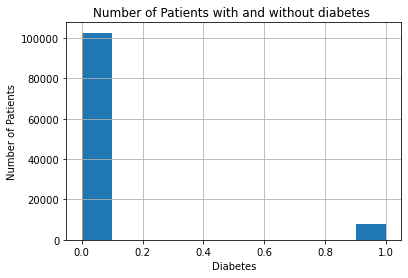

In [27]:
ax= df['diabetes'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Diabetes')
ax.set_title('Number of Patients with and without diabetes ')

#### people with diabetes are less than the ones without based on the histogram above. they're less than 20000

Text(0.5, 1.0, 'Number of Patients with and without alcoholism ')

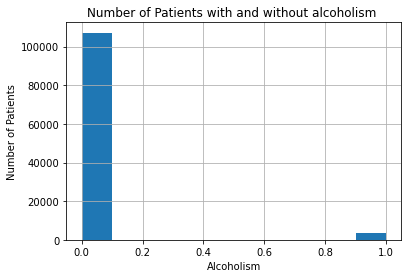

In [28]:
ax= df['alcoholism'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Alcoholism')
ax.set_title('Number of Patients with and without alcoholism ')

#### people with alcoholism are less than the ones without based on the histogram above. they're literally less than 10000

Text(0.5, 1.0, 'Number of Patients with and without handcap ')

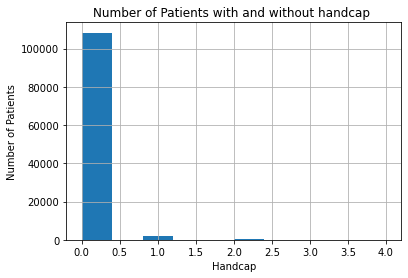

In [29]:
ax= df['handcap'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Handcap')
ax.set_title('Number of Patients with and without handcap ')

#### people with handcap are less than the ones without based on the histogram above. they look insignificant on the histogram. We can say that they may not have a real impact on our analysis

Text(0.5, 1.0, 'Number of Patients that showed up and not')

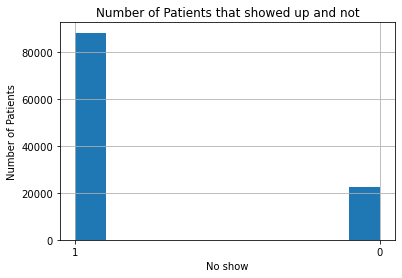

In [30]:
ax= df['no_show'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('No show')
ax.set_title('Number of Patients that showed up and not')

#### Based on the histogram above, we can see that, regardless of the gender and all other features, people who didnt showed up to their appointments are more that those who showed up. We are going to see what make them not showing up to their appointments based on all others features

### Here, i want to know the number of persons with or without hipertension or diabetes or alcoholism or handacap that showed up or not because the main question of our analysis is to know which features impact more in a patient showing up or not. So i want to know these number based on these 4 specific features since i didnt ask questions about them

In [31]:
df.groupby(['hipertension', 'no_show']).size()


hipertension  no_show
0             0          18547
              1          70178
1             0           3772
              1          18029
dtype: int64

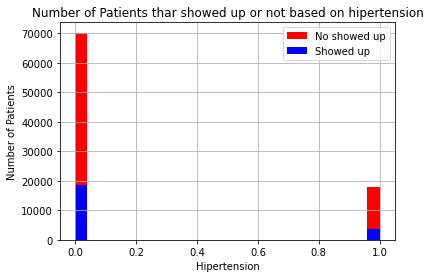

In [32]:
plt.hist(df.hipertension[df.no_show == "1"], 25, facecolor='r', alpha=1, label='No showed up');
plt.hist(df.hipertension[df.no_show == "0"], 25, facecolor='b', alpha=1, label='Showed up');
plt.legend()
plt.xlabel('Hipertension')
plt.ylabel('Number of Patients')
plt.title('Number of Patients thar showed up or not based on hipertension')
plt.grid(True)

#### On the histogram above, we can see that for patients with or without hipertension , those who showed up in blue are less than the ones in red who didnt showed up. Since not everybody have hipertension and they're few in our dataset, it's normal. Hipertension doesnt impact in the patients showing up to their appointments

In [33]:
df.groupby(['diabetes', 'no_show']).size()

diabetes  no_show
0         0          20889
          1          81694
1         0           1430
          1           6513
dtype: int64

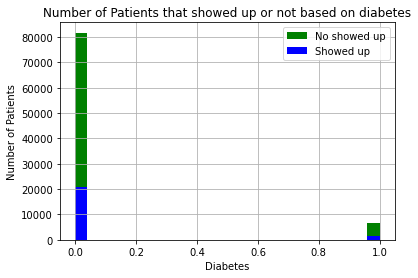

In [34]:
plt.hist(df.diabetes[df.no_show == "1"], 25, facecolor='g', alpha=1, label='No showed up');
plt.hist(df.diabetes[df.no_show == "0"], 25, facecolor='b', alpha=1, label='Showed up');
plt.legend()
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients')
plt.title('Number of Patients that showed up or not based on diabetes')
plt.grid(True)

####  As for the patients with hipertension, same conclusion for patients with diabetes

In [35]:
df.groupby(['alcoholism', 'no_show']).size()

alcoholism  no_show
0           0          21642
            1          85524
1           0            677
            1           2683
dtype: int64

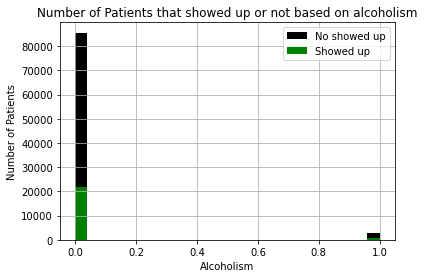

In [36]:

plt.hist(df.alcoholism[df.no_show == "1"], 25, facecolor='black', label='No showed up');
plt.hist(df.alcoholism[df.no_show == "0"], 25, facecolor='g', label='Showed up');
plt.legend()
plt.xlabel('Alcoholism')
plt.ylabel('Number of Patients')
plt.title('Number of Patients that showed up or not based on alcoholism')
plt.grid(True)

### Since we have less people with alcoholism, diabetes and hipertension, those who showed up are also less than patient without alcoholism, diabetes and hipertension

In [37]:
df.groupby(['handcap', 'no_show']).size()

handcap  no_show
0        0          21912
         1          86373
1        0            366
         1           1676
2        0             37
         1            146
3        0              3
         1             10
4        0              1
         1              2
dtype: int64

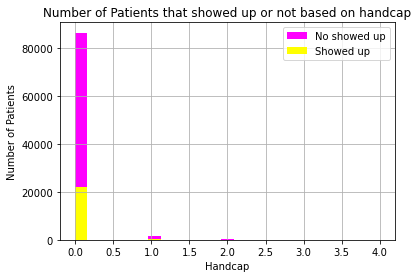

In [38]:
plt.hist(df.handcap[df.no_show == "1"], 25, facecolor='magenta', label='No showed up');
plt.hist(df.handcap[df.no_show == "0"], 25, facecolor='yellow', label='Showed up');
plt.legend()
plt.xlabel('Handcap')
plt.ylabel('Number of Patients')
plt.title('Number of Patients that showed up or not based on handcap')
plt.grid(True)

### For handcap, people with handicap 0 showed up more. then we have handcap 1, 2, 3,4.

## QUESTION 1= Did the scholarship of patients helped in showing up to their appointments?

### I will  create  dataframe for M and F

In [39]:
df_m= df.query('gender== "M"')
df_f=df.query('gender=="F"')

In [40]:
df_m.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
1,M,56,JARDIM DA PENHA,0,0,0,0,0,1
11,M,29,NOVA PALESTINA,0,0,0,0,0,0
13,M,28,NOVA PALESTINA,0,0,0,0,0,1
16,M,50,NOVA PALESTINA,0,0,0,0,0,1
22,M,13,CONQUISTA,0,0,0,0,0,0


In [41]:
df_f.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,1
5,F,76,REPÚBLICA,0,1,0,0,0,1


### Then, i will create dataframe for each gender and grouping them by scholarship and no_show. It will make me know the number numerically for both gender with or without scholarship based on whose showed up or not

In [42]:
df_mm= df_m.groupby(['scholarship','no_show'] , as_index=False).size()

In [43]:
df_mm

,scholarship,no_show,size
0,0,0,7253
1,0,1,29426
2,1,0,472
3,1,1,1536


In [44]:
df_ff= df_f.groupby(['scholarship','no_show'] , as_index=False).size()

In [45]:
df_ff

,scholarship,no_show,size
0,0,0,12488
1,0,1,50498
2,1,0,2106
3,1,1,6747


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


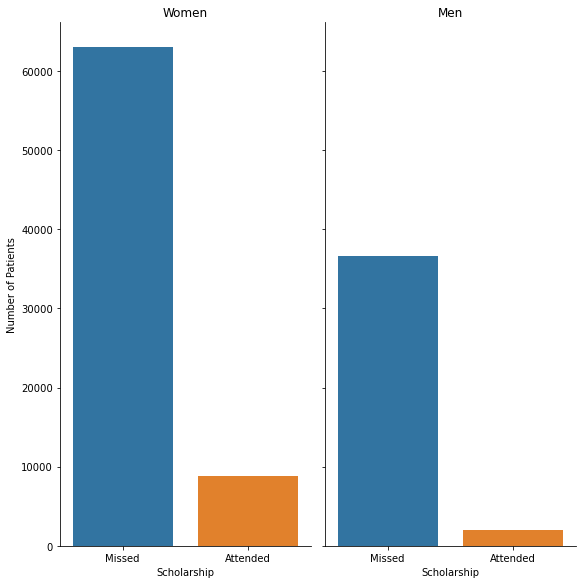

In [46]:
g = sns.factorplot('scholarship', col='gender', data=df, kind='count', size=8, aspect=0.5)
g.set_axis_labels('Scholarship', 'Number of Patients').set_xticklabels(['Missed', 'Attended'])
titles = ['Women', 'Men']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

#### Based on the graph above and the outputs we got on df_mm and df_ff dataframes, for men, those without scholarship that showed up to their appointments are more than those with scholarship that showed up to their appointments.Same conclusion for women. So scholarship aint impacting in patients showing up to their appointments for men and women. But also,in general, women are more likely to showed up to their appointments than men

### This time i want to answer the same question with three category which are Children, Women and Men it wull permit me to be more specific in my analysis and give better outputs

#### Let's create category column

In [47]:
df.loc[((df['gender'] == 'F') &(df['age'] >= 18)),'category'] = 'Woman'

In [48]:
df.loc[((df['gender'] == 'M') &(df['age'] >= 18)),'category'] = 'Man'

In [49]:
df.loc[(df['age'] < 18),'category'] = 'Child'

In [50]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show,category
0,F,62,JARDIM DA PENHA,0,1,0,0,0,1,Woman
1,M,56,JARDIM DA PENHA,0,0,0,0,0,1,Man
2,F,62,MATA DA PRAIA,0,0,0,0,0,1,Woman
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,1,Child
4,F,56,JARDIM DA PENHA,0,1,1,0,0,1,Woman


In [51]:
df_mfc= df.groupby(['scholarship','category', 'no_show'] , as_index=False).size()

In [52]:
df_mfc

,scholarship,category,no_show,size
0,0,Child,0,5255
1,0,Child,1,19062
2,0,Man,0,4632
3,0,Man,1,19908
4,0,Woman,0,9854
5,0,Woman,1,40954
6,1,Child,0,742
7,1,Child,1,2320
8,1,Man,0,158
9,1,Man,1,508


### Above, we can see numerically that scholarship aint impacting patients attended their appointments. but women attended more, then children and men

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


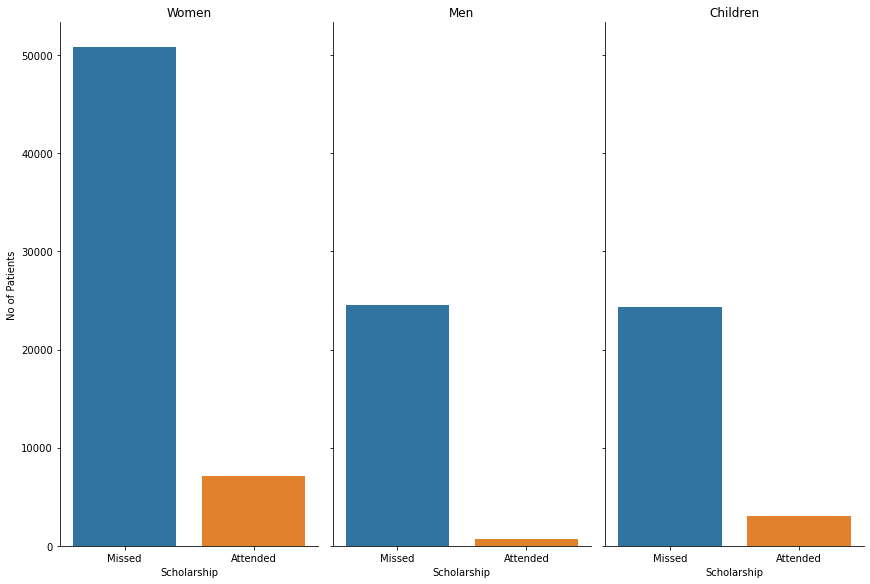

In [53]:
g = sns.factorplot('scholarship', col='category', data=df, kind='count', size=8, aspect=0.5)
g.set_axis_labels('Scholarship', 'No of Patients').set_xticklabels(['Missed', 'Attended'])
titles = ['Women', 'Men', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

### As we can see in the graph above, scholarship doesnt affect the number of people who showed up to their appointments. Women with scholarship attended the most, then we have children and then men.  So Scholarship doesnt encourage  the patients showing up to their appointments

##  QUESTION 2: between children, women and men, who attend the most their appointments?

### i will create a dataframe by grouping the caegory and no_show columns. Then i will plot it to answer the question

In [54]:
df_appointments= df.groupby(['category','no_show']).size()

In [55]:
df_appointments

category  no_show
Child     0           5997
          1          21382
Man       0           4790
          1          20416
Woman     0          11532
          1          46409
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


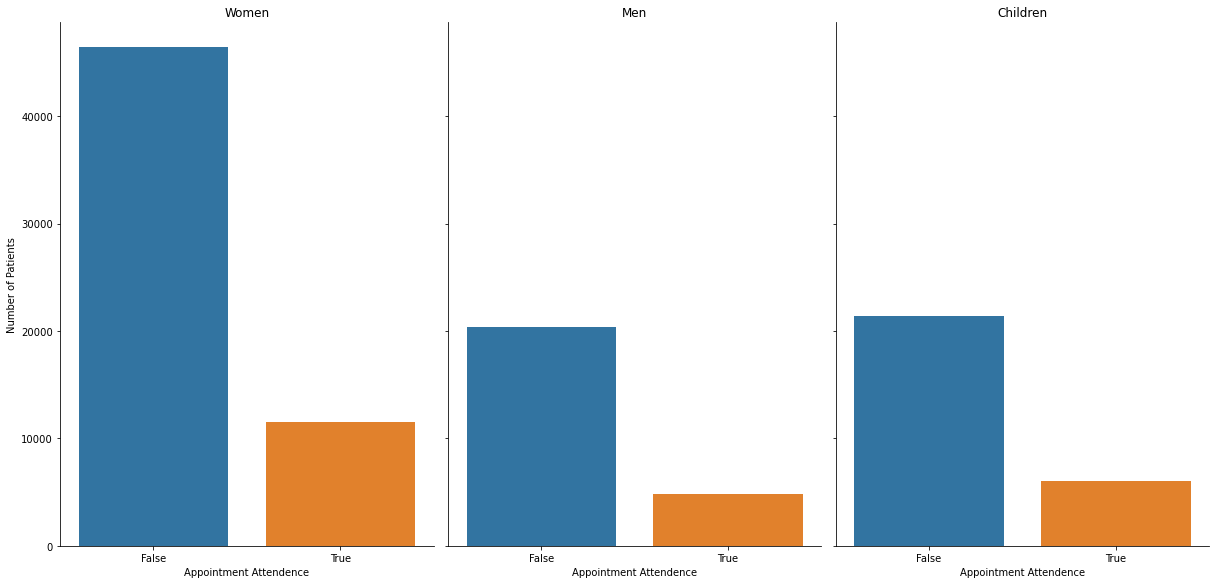

In [56]:
g = sns.factorplot('no_show', col='category', data=df, kind='count', size=8, aspect=0.7)
g.set_axis_labels('Appointment Attendence', 'Number of Patients').set_xticklabels(['False', 'True'])
titles = ['Women', 'Men', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

### We can see that women mostly showed up to their appointments, then we have children and then men. We can say that women are more interested by their health than children and men

## Question 3: Age impact appointments?

### I will first create two dataframe for those who showed up and not then i will do visualizations

In [57]:
df_noapp = df.query('no_show == "1"')
df_app = df.query('no_show =="0"')

In [58]:
df_app.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [59]:
df_noapp.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742
std,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


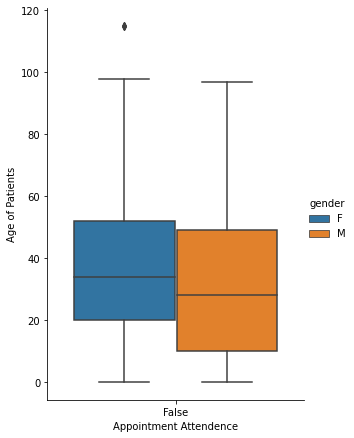

In [60]:
g = sns.factorplot(x="no_show", y="age", hue='gender', data=df_app, kind="box", size=6, aspect=.7)
g.set_axis_labels('Appointment Attendence', 'Age of Patients').set_xticklabels(["False"])

### After plotting for the dataframe of people who didnt showed up based on age, i will comment the two box plot together

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


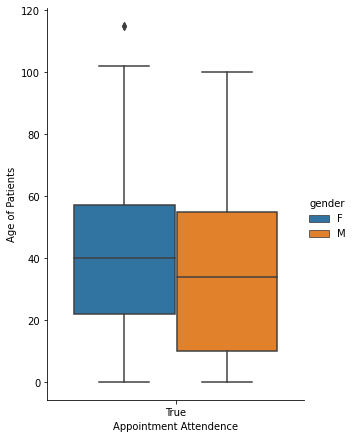

In [61]:
g = sns.factorplot(x="no_show", y="age", hue='gender', data=df_noapp, kind="box", size=6, aspect=.7)
g.set_axis_labels('Appointment Attendence', 'Age of Patients').set_xticklabels(["True"])

### Based on the two boxplot , if we first dont consider gender, we can see that age was not a real factor in the appointment attendence.Also, the number of women who showed up and not is more important than men 

# Conclusions

### First, we found an age with a negative value. I removed to use a more correct dataset  , because for me, it's surely an error . We saw that women are the most to not miss their appointment, then children and finally men. This can be explained by many others social  life parameters.   Also, having a scholarship or no  dontt impact in the appointments. Only few peoples have scholarship, so it's understandable. Age also doesnt impact in the appointments, almost  same mean age, oldest age and others parameters between those who showed up and not. We can do more with this dataset . For example, we can categorize the age as i did with the column category. So we could see clearly how ages impact on appointments, also associate it with another features. Also we can check it for each neighbourhood



# Limitations

#### For a better analysis, if we could have the real distance between the neighbourhood and the hospital, it may helps us to understand more if the patients showed up or not